# Using CAMELS-US for SHM

In [2]:
# Imports
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import torch
from neuralhydrology.nh_run import start_run, eval_run

# With old code (DO NOT RERUN)

Here, using old code with CAMELS_US data with location 1 conceptual forcing being SRAD. 

In [3]:
# fall back to CPU-only mode
start_run(config_file=Path("2basin_shm.yml"), gpu=-1)

2026-02-10 10:27:58,032: Logging to /Users/ziyu/Library/CloudStorage/OneDrive-ColoradoSchoolofMines/Documents/College/ResearchStuff/NextGen/neuralhydrology/examples/07-SHM/runs/test_SHM_1002_102758/output.log initialized.
2026-02-10 10:27:58,033: ### Folder structure created at /Users/ziyu/Library/CloudStorage/OneDrive-ColoradoSchoolofMines/Documents/College/ResearchStuff/NextGen/neuralhydrology/examples/07-SHM/runs/test_SHM_1002_102758
2026-02-10 10:27:58,033: ### Run configurations for test_SHM
2026-02-10 10:27:58,033: experiment_name: test_SHM
2026-02-10 10:27:58,034: train_basin_file: 2_basin.txt
2026-02-10 10:27:58,034: validation_basin_file: 2_basin.txt
2026-02-10 10:27:58,034: test_basin_file: 2_basin.txt
2026-02-10 10:27:58,034: train_start_date: 2000-10-01 00:00:00
2026-02-10 10:27:58,035: train_end_date: 2014-09-30 00:00:00
2026-02-10 10:27:58,035: validation_start_date: 1990-10-01 00:00:00
2026-02-10 10:27:58,036: validation_end_date: 1999-09-30 00:00:00
2026-02-10 10:27:58,

In [4]:
run_dir = Path("runs/test_SHM_1002_102758")
eval_run(run_dir=run_dir, period="test")

2026-02-10 11:18:03,749: Using the model weights from runs/test_SHM_1002_102758/model_epoch010.pt
# Evaluation: 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]
2026-02-10 11:18:05,226: Stored metrics at runs/test_SHM_1002_102758/test/model_epoch010/test_metrics.csv
2026-02-10 11:18:05,229: Stored results at runs/test_SHM_1002_102758/test/model_epoch010/test_results.p


In [6]:
with open(run_dir / "test" / "model_epoch010" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results.keys()

dict_keys(['02177000', '02349900'])

Text(0.5, 1.0, 'Test period 02349900 - NSE 0.588')

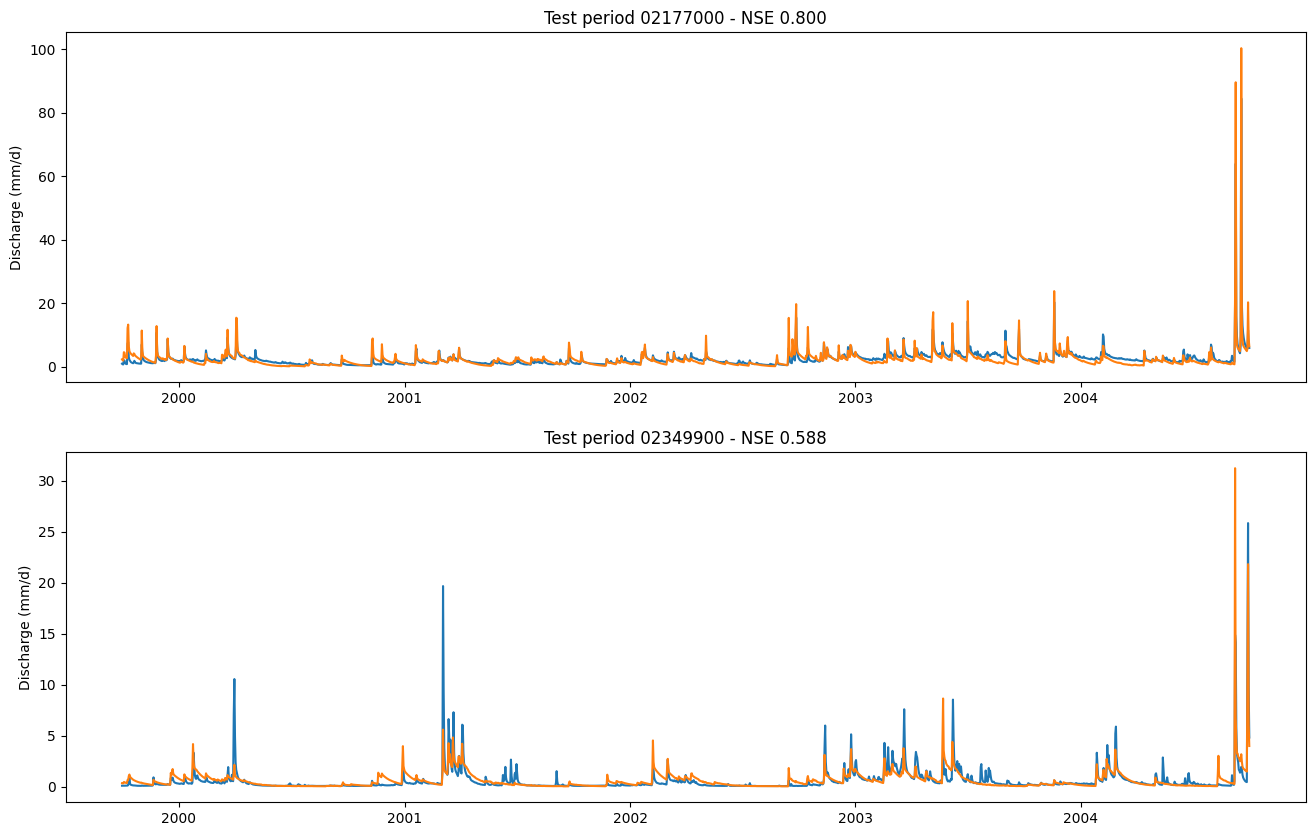

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))
basin = '02177000'
qobs = results[basin]['1D']['xr']['QObs(mm/d)_obs']
qsim = results[basin]['1D']['xr']['QObs(mm/d)_sim']
ax[0].plot(qobs['date'], qobs)
ax[0].plot(qsim['date'], qsim)
ax[0].set_ylabel("Discharge (mm/d)")
ax[0].set_title(f"Test period 02177000 - NSE {results[basin]['1D']['NSE']:.3f}")

basin = '02349900'
qobs = results[basin]['1D']['xr']['QObs(mm/d)_obs']
qsim = results[basin]['1D']['xr']['QObs(mm/d)_sim']
ax[1].plot(qobs['date'], qobs)
ax[1].plot(qsim['date'], qsim)
ax[1].set_ylabel("Discharge (mm/d)")
ax[1].set_title(f"Test period 02349900 - NSE {results[basin]['1D']['NSE']:.3f}")

## With PET Update

This implemented the PET scheme, everything else are exactly the same. If implemented correctly, we expect no errors and the output would be different than the previous section. 

In [3]:
# fall back to CPU-only mode
start_run(config_file=Path("2basin_shm.yml"), gpu=-1)

2026-02-10 14:10:18,006: Logging to /Users/ziyu/Library/CloudStorage/OneDrive-ColoradoSchoolofMines/Documents/College/ResearchStuff/NextGen/neuralhydrology/examples/07-SHM/runs/test_SHM_1002_141018/output.log initialized.
2026-02-10 14:10:18,006: ### Folder structure created at /Users/ziyu/Library/CloudStorage/OneDrive-ColoradoSchoolofMines/Documents/College/ResearchStuff/NextGen/neuralhydrology/examples/07-SHM/runs/test_SHM_1002_141018
2026-02-10 14:10:18,006: ### Run configurations for test_SHM
2026-02-10 14:10:18,007: experiment_name: test_SHM
2026-02-10 14:10:18,007: train_basin_file: 2_basin.txt
2026-02-10 14:10:18,007: validation_basin_file: 2_basin.txt
2026-02-10 14:10:18,007: test_basin_file: 2_basin.txt
2026-02-10 14:10:18,008: train_start_date: 2000-10-01 00:00:00
2026-02-10 14:10:18,008: train_end_date: 2014-09-30 00:00:00
2026-02-10 14:10:18,008: validation_start_date: 1990-10-01 00:00:00
2026-02-10 14:10:18,008: validation_end_date: 1999-09-30 00:00:00
2026-02-10 14:10:18,

In [ ]:
run_dir_new = Path("runs/test_SHM_1002_141018")
#eval_run(run_dir=run_dir_new, period="test")
with open(run_dir_new / "test" / "model_epoch010" / "test_results.p", "rb") as fp:
    results_new = pickle.load(fp)

2026-02-10 14:14:17,862: Using the model weights from runs/test_SHM_1002_141018/model_epoch010.pt
# Evaluation: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]
2026-02-10 14:14:19,149: Stored metrics at runs/test_SHM_1002_141018/test/model_epoch010/test_metrics.csv
2026-02-10 14:14:19,150: Stored results at runs/test_SHM_1002_141018/test/model_epoch010/test_results.p


Text(0.5, 1.0, 'Test period 02349900 - NSE 0.734')

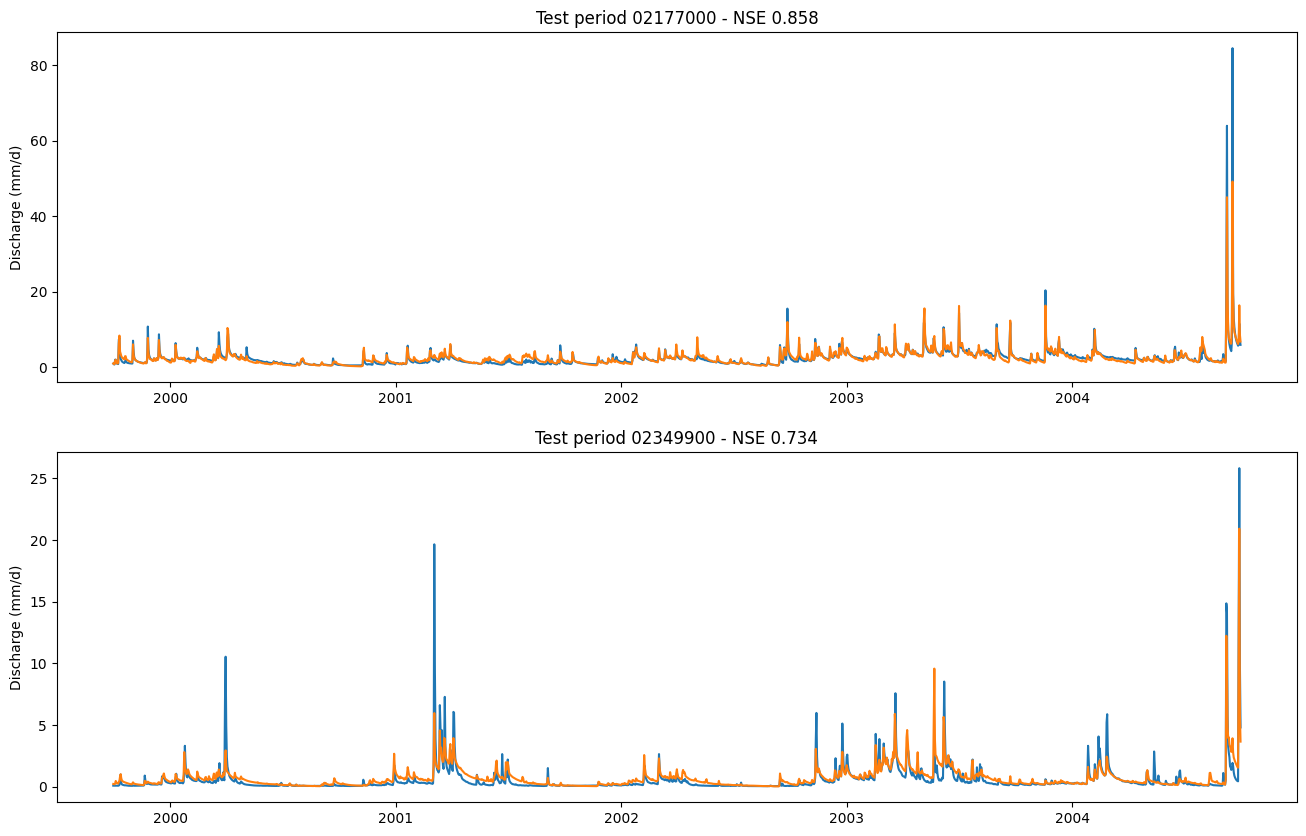

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))
basin = '02177000'
qobs = results_new[basin]['1D']['xr']['QObs(mm/d)_obs']
qsim = results_new[basin]['1D']['xr']['QObs(mm/d)_sim']
ax[0].plot(qobs['date'], qobs)
ax[0].plot(qsim['date'], qsim)
ax[0].set_ylabel("Discharge (mm/d)")
ax[0].set_title(f"Test period 02177000 - NSE {results_new[basin]['1D']['NSE']:.3f}")

basin = '02349900'
qobs = results_new[basin]['1D']['xr']['QObs(mm/d)_obs']
qsim = results_new[basin]['1D']['xr']['QObs(mm/d)_sim']
ax[1].plot(qobs['date'], qobs)
ax[1].plot(qsim['date'], qsim)
ax[1].set_ylabel("Discharge (mm/d)")
ax[1].set_title(f"Test period 02349900 - NSE {results_new[basin]['1D']['NSE']:.3f}")

There's no errors and also seems like the performance are better. 

# Changing seq_length in Config

Verifying changing seq_length changes output. This was changed from 365 to 181 (warm_up = 180 + predict_last_n = 1) compared to last. In previous cases, 180 of the seq_length was discarded hence SHM ran for 185 timesteps before making a prediction at the 185th timestep. In this case, SHM will only run 1 timestep and make a prediction right the way. We expect this model will do worse since initial conditions are the same and the model didn't "spin-up".

In [7]:
# fall back to CPU-only mode
start_run(config_file=Path("2basin_shm.yml"), gpu=-1)

2026-02-10 14:21:57,808: Logging to /Users/ziyu/Library/CloudStorage/OneDrive-ColoradoSchoolofMines/Documents/College/ResearchStuff/NextGen/neuralhydrology/examples/07-SHM/runs/test_SHM_1002_142157/output.log initialized.
2026-02-10 14:21:57,809: ### Folder structure created at /Users/ziyu/Library/CloudStorage/OneDrive-ColoradoSchoolofMines/Documents/College/ResearchStuff/NextGen/neuralhydrology/examples/07-SHM/runs/test_SHM_1002_142157
2026-02-10 14:21:57,810: ### Run configurations for test_SHM
2026-02-10 14:21:57,810: experiment_name: test_SHM
2026-02-10 14:21:57,810: train_basin_file: 2_basin.txt
2026-02-10 14:21:57,811: validation_basin_file: 2_basin.txt
2026-02-10 14:21:57,811: test_basin_file: 2_basin.txt
2026-02-10 14:21:57,811: train_start_date: 2000-10-01 00:00:00
2026-02-10 14:21:57,812: train_end_date: 2014-09-30 00:00:00
2026-02-10 14:21:57,812: validation_start_date: 1990-10-01 00:00:00
2026-02-10 14:21:57,812: validation_end_date: 1999-09-30 00:00:00
2026-02-10 14:21:57,

In [ ]:
run_dir_new = Path("runs/test_SHM_1002_142157")
#eval_run(run_dir=run_dir_new, period="test")
with open(run_dir_new / "test" / "model_epoch010" / "test_results.p", "rb") as fp:
    results_new = pickle.load(fp)

2026-02-10 14:25:32,469: Using the model weights from runs/test_SHM_1002_142157/model_epoch010.pt
# Evaluation: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
2026-02-10 14:25:33,045: Stored metrics at runs/test_SHM_1002_142157/test/model_epoch010/test_metrics.csv
2026-02-10 14:25:33,047: Stored results at runs/test_SHM_1002_142157/test/model_epoch010/test_results.p


Text(0.5, 1.0, 'Test period 02349900 - NSE 0.673')

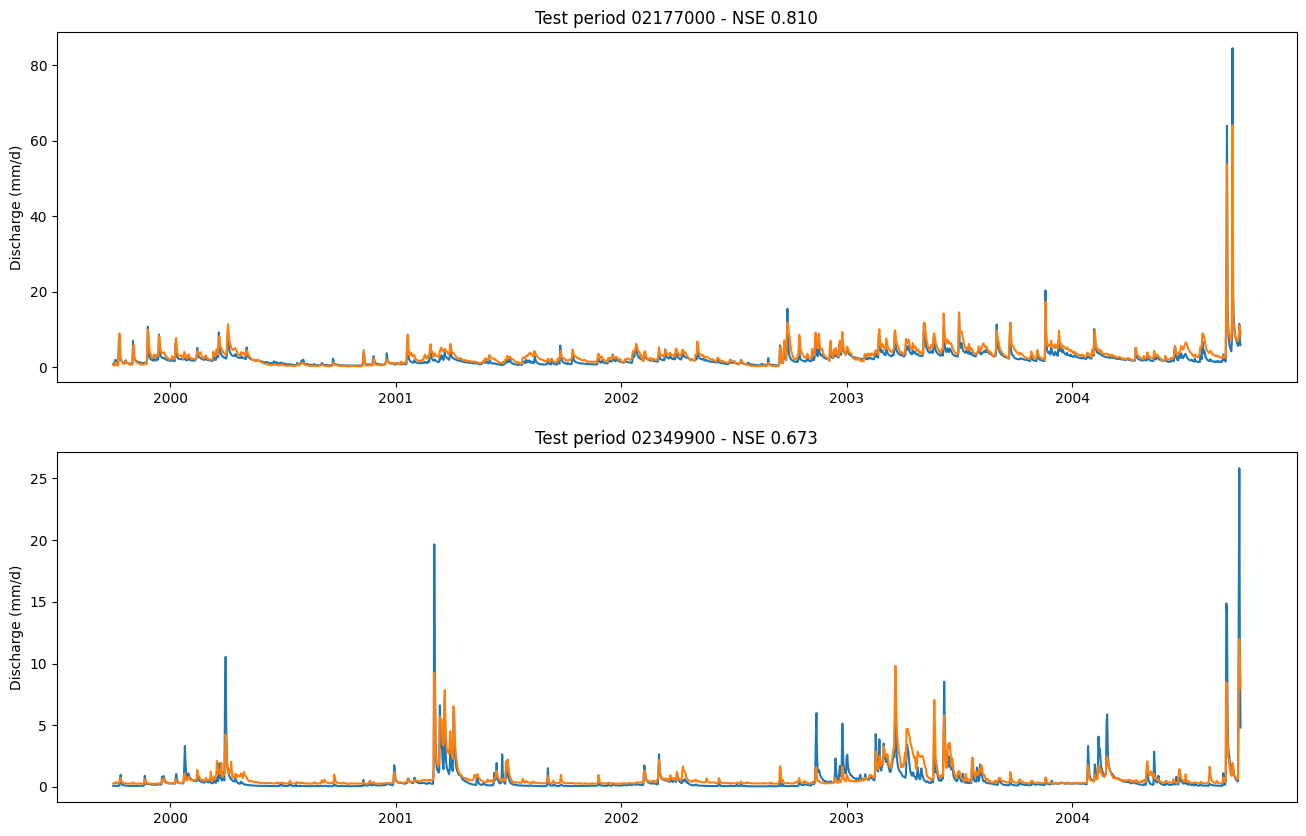

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))
basin = '02177000'
qobs = results_new[basin]['1D']['xr']['QObs(mm/d)_obs']
qsim = results_new[basin]['1D']['xr']['QObs(mm/d)_sim']
ax[0].plot(qobs['date'], qobs)
ax[0].plot(qsim['date'], qsim)
ax[0].set_ylabel("Discharge (mm/d)")
ax[0].set_title(f"Test period 02177000 - NSE {results_new[basin]['1D']['NSE']:.3f}")

basin = '02349900'
qobs = results_new[basin]['1D']['xr']['QObs(mm/d)_obs']
qsim = results_new[basin]['1D']['xr']['QObs(mm/d)_sim']
ax[1].plot(qobs['date'], qobs)
ax[1].plot(qsim['date'], qsim)
ax[1].set_ylabel("Discharge (mm/d)")
ax[1].set_title(f"Test period 02349900 - NSE {results_new[basin]['1D']['NSE']:.3f}")